In [1]:
#importing required packages
import io
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
df2 = pd.read_csv('dataset.csv')
df2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0


1047433
1142
Percentage frauds: 0.0010902845337124188


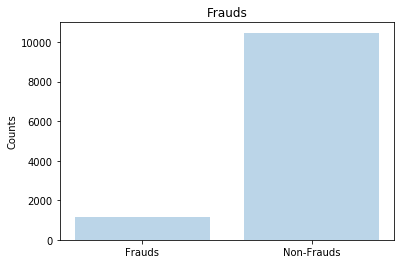

In [2]:
#plotting number of non frauds and frauds

%matplotlib inline
import matplotlib.pyplot as plt
frauds = list(df2['isFraud'])
frauds

# print(frauds)
count_0 = 0
count_1 = 0
for i in frauds:
    if(i==0):
       count_0 += 1
    else:
        count_1 += 1
print(count_0)
print(count_1)
print('Percentage frauds:',count_1/count_0)

objects = ('Frauds', 'Non-Frauds')
y_pos = np.arange(len(objects))

#The number of frauds are too less to be seen in the plot so the count of non-frauds has been divided by 100 for better clarity.

performance = [count_1,count_0/100]
plt.bar(y_pos, performance, align='center', alpha=0.3)
plt.xticks(y_pos, objects)
plt.ylabel('Counts')
plt.title('Frauds')
plt.show()

Types of transactions that have Frauds:  ['TRANSFER', 'CASH_OUT']


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.00,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.00,2719172.89,0,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.00,C1509514333,288800.00,2415.16,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.00,C824009085,70253.00,64106.18,0,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.00,C248609774,652637.00,6453430.91,0,0
51,1,CASH_OUT,23261.30,C2072313080,20411.53,0.00,C2001112025,25742.00,0.00,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.20,C1937962514,517.00,8383.29,0,0


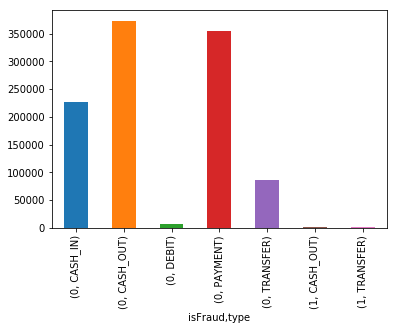

In [3]:
# the below data and plot shows the distribution of the fraud transactions in the type of data

# types of fraud transactions
fraud_trans = list(df2.loc[df2.isFraud==1].type.drop_duplicates().values)
print('Types of transactions that have Frauds: ',fraud_trans)

# plot for the same
fraud_count = df2.groupby(['isFraud','type']).size().plot(kind='bar')

# removing the data which do not have fraudalant transactions
trans_data_new = df2.loc[(df2['type'].isin(['TRANSFER','CASH_OUT'])),:] 
trans_data_new

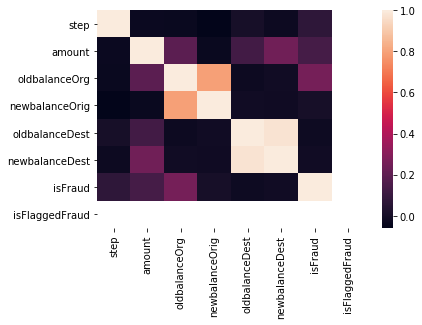

In [4]:
sns.heatmap(trans_data_new.corr())


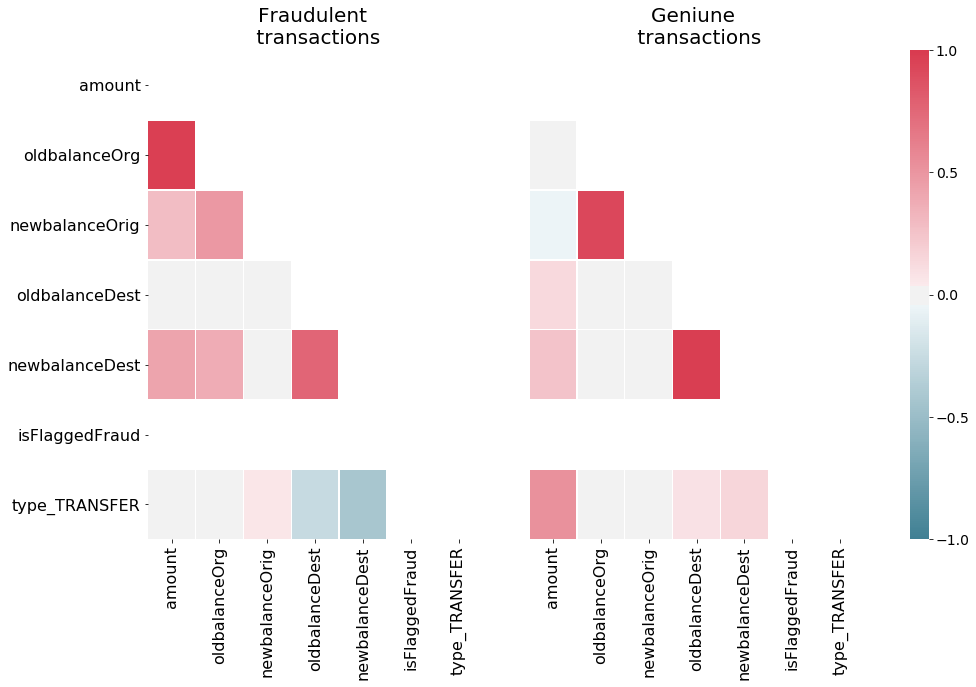

In [5]:
#Plotting the correlation between the features for fraud and genuine transactions
X = trans_data_new.drop(columns=['isFraud'])

# removing the columns with low correlation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

import seaborn as sns
Xfraud = X.loc[y['isFraud']==1] # update Xfraud & XnonFraud with cleaned data
Xnonfraud = X.loc[y['isFraud']==0]
                  
correlationFraud = Xfraud.loc[:, X.columns != 'step'].corr()
mask = np.zeros_like(correlationFraud)
indices = np.triu_indices_from(correlationFraud)
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, \
                                     figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Fraudulent \n transactions', size = 20)

correlationnonFraud = Xnonfraud.loc[:, X.columns != 'step'].corr()
ax2 = sns.heatmap(correlationnonFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Geniune \n transactions', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);

In [6]:
# Snippet to create the train and test splits 
X = trans_data_new.drop(columns=['isFraud'])

# removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

# getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
# Checking for the best value of C parameter for Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
C_threshold=[0.001, 0.01, 0.1, 1]
max=0
best_parameter=0
for alpha in C_threshold:
  lr = LogisticRegression(C = alpha, penalty = 'l2')
  y_pred_undersample_score = lr.fit(X_train,y_train.values.ravel()).decision_function(X_test.values)

  fpr, tpr, thresholds = roc_curve(y_test.values.ravel(),y_pred_undersample_score)
  roc_auc = auc(fpr,tpr)
  if roc_auc>max:
    max=roc_auc
    best_parameter=alpha
print("Best hyperparamater/c-value {}".format(best_parameter))

Best hyperparamater/c-value 0.001


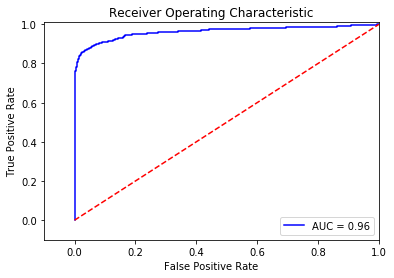

In [8]:
#Plotting the ROC curve for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
lr = LogisticRegression(C = 1, penalty = 'l2')
y_pred_undersample_score = lr.fit(X_train,y_train.values.ravel()).decision_function(X_test.values)
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [9]:
#Classification using Logistic regression
X = trans_data_new.drop(columns=['isFraud'])

#Removing the columns with low correlation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

#Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

#Getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])


#Getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

lr_ac = accuracy_score(y_test, y_pred)*100
lr_rs = recall_score(y_test, y_pred)*100
lr_ps = precision_score(y_test, y_pred)*100
lr_fs = f1_score(y_test, y_pred)*100

#Logistic Regression Model Graph

print('Logistic Regression -')
print('Accuracy:',lr_ac,'%')
print('Recall:',lr_rs,'%')
print('Precision:',lr_ps,'%')
print('F1 score:',lr_fs,'%')

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression -
Accuracy: 99.8249205231322 %
Recall: 73.19587628865979 %
Precision: 63.67713004484305 %
F1 score: 68.10551558752996 %


In [10]:
#Classification using Random Forest method

#Getting the independent variable
X = trans_data_new.drop(columns=['isFraud'])

#Removing the columns with low correlation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

#Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

#Getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])


#Getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)




#Random Forest Model

#--------------------------

#from sklearn.ensemble import RandomForestRegressor
#Instantiate model with 1000 decision trees
#rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# # Train the model on training data
# rf.fit(X_train,y_train);
# y_pred = rf.predict(X_test)

#-------------------------

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_ac = accuracy_score(y_test, y_pred)*100
rf_rs = recall_score(y_test, y_pred)*100
rf_ps = precision_score(y_test, y_pred)*100
rf_fs = f1_score(y_test, y_pred)*100

#Random Forest Model Graph

print('Random Forest Model-')
print('Accuracy:',rf_ac,'%')
print('Recall:',rf_rs,'%')
print('Precision:',rf_ps,'%')
print('F1 score:',rf_fs,'%')

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Forest Model-
Accuracy: 99.90851110043376 %
Recall: 67.26804123711341 %
Precision: 95.6043956043956 %
F1 score: 78.9712556732224 %


In [ ]:
#Classification using KNN classifier

#Getting the independent variable
from sklearn.model_selection import cross_val_score
X = trans_data_new.drop(columns=['isFraud'])

#Removing the columns with low correlation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

#Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

#Getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

#Getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# X_train_train, X_validate, y_train_train, y_validate = train_test_split(X_train,y_train, test_size = 0.33, random_state = 42)

#KNN Model

from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,12)
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn,X_train, y_train, cv=10, scoring = 'accuracy')
    k_score.append(score.mean())

#PLot for getting the best k-value for KNN
#print(k_score)
%matplotlib inline
import matplotlib.pyplot as plt
algos = range(1,16)
precisions = np.arange(11)
performance = [0.9986073503739492, 0.998994167616751, 0.9989015038762489, 0.9989844701826799, 0.9989359833519117, 0.9989639979373166, 0.9989402932294092, 0.9989392157593091, 0.9989182048166274, 0.9989289796830663, 0.9989171273378201] 
bars = plt.bar(precisions, performance, align='center', alpha=0.9)
plt.xticks(precisions, algos,rotation='vertical')
plt.ylabel('Accuracy')
plt.title('K_values') 
plt.show()